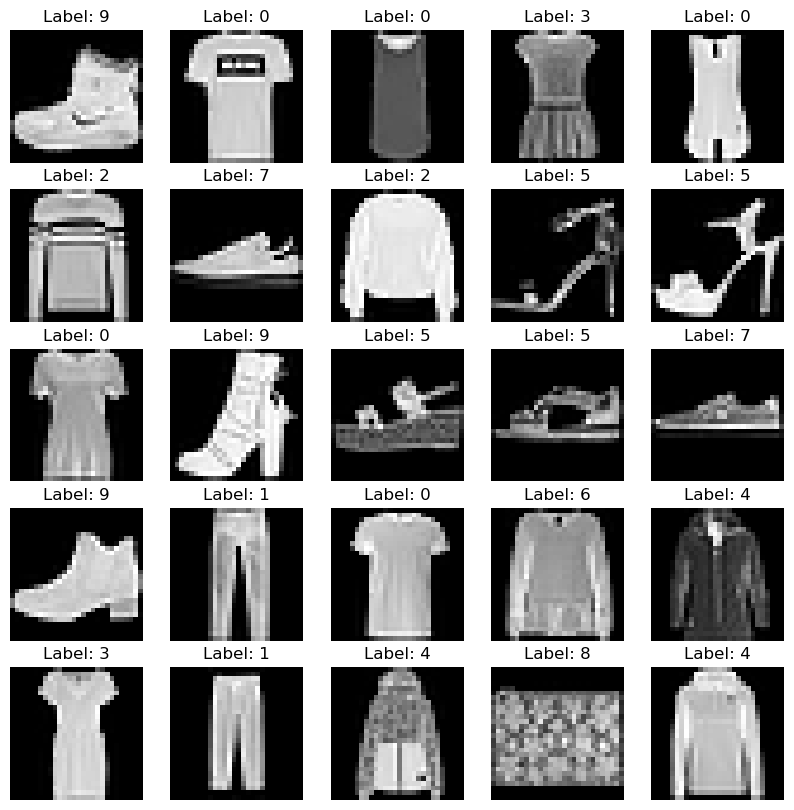

C:\Users\HP-PC\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
   4/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.0840 - loss: 2.3989

C:\Users\HP-PC\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.5008 - loss: 1.3438
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6474 - loss: 0.9455
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6749 - loss: 0.8670
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6837 - loss: 0.8392
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6900 - loss: 0.8165
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6969 - loss: 0.8004
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7047 - loss: 0.7831
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7052 - loss: 0.7833
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7069 - loss: 0.7713
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7134 - loss: 0.7637
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7150 - loss: 0.7554
Epoch 12/50
1875/18

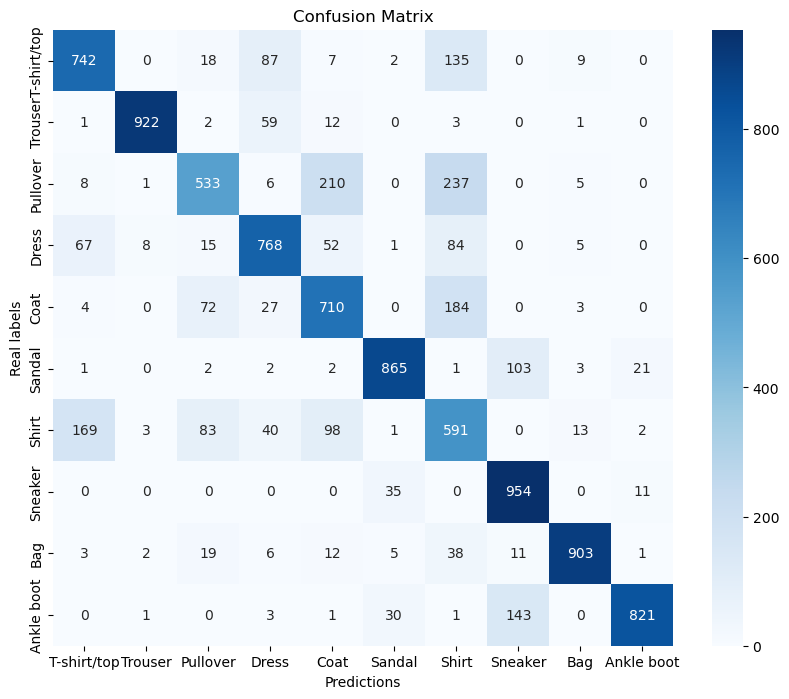

Classification report is: 
               precision    recall  f1-score   support

 T-shirt/top       0.75      0.74      0.74      1000
     Trouser       0.98      0.92      0.95      1000
    Pullover       0.72      0.53      0.61      1000
       Dress       0.77      0.77      0.77      1000
        Coat       0.64      0.71      0.67      1000
      Sandal       0.92      0.86      0.89      1000
       Shirt       0.46      0.59      0.52      1000
     Sneaker       0.79      0.95      0.86      1000
         Bag       0.96      0.90      0.93      1000
  Ankle boot       0.96      0.82      0.88      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

# Model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Data Processing: Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

# Model Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

model.fit(datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=32), epochs=50)

# Model Evaluation
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)
print(f'\nPresicion sur l\'ensemble du test est : {test_acc}')

# calculate predictions
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

# conversion to classes index
predicted_classes = np.argmax(predictions, axis=1)

# Build the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# visualize heatmap of the conf_matrix
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('Real labels')
plt.title('Confusion Matrix')
plt.show()

# classification report
class_report = classification_report(test_labels, predicted_classes, target_names=class_names)
print("Classification report is: \n", class_report)



In [18]:
# User Interface
def load_and_predict():
    file_path = filedialog.askopenfilename()  # Open the dialog to select a file
    if file_path:
        # Load the image
        img = Image.open(file_path).convert("L")  # Convert to grayscale
        img = img.resize((28, 28))  # Resize the image to the model's expected size

        # Display the image in the UI
        img_tk = ImageTk.PhotoImage(img)
        image_label.config(image=img_tk)
        image_label.image = img_tk

        # Preprocess the image for prediction
        img_array = np.array(list(img.getdata()), dtype=np.float32) / 255.0  # Normalizing values
        img_array = img_array.reshape(28, 28, 1)
        img_array = np.expand_dims(img_array, axis=0)

        # Make a prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Display the prediction in the UI
        result_label.config(text=f"Prediction: Class {predicted_class}")

        # Print additional information for debugging
        print("Raw Prediction:", prediction)
        print("Predicted Class:", predicted_class)
        
# Create the main window
window = tk.Tk()
window.title("Image Classification")

# Button to load an image and make a prediction
load_button = tk.Button(window, text="Load Image", command=load_and_predict)
load_button.pack(pady=10)

# Label to display the loaded image
image_label = tk.Label(window)
image_label.pack()

# Label to display the prediction
result_label = tk.Label(window, text="")
result_label.pack(pady=10)

# Run the UI
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Raw Prediction: [[3.5151758e-04 1.4554647e-07 3.6827856e-01 1.4663282e-04 6.2272555e-01
  9.8635189e-07 8.0536343e-03 3.8041472e-09 4.3096859e-04 1.1962738e-05]]
Predicted Class: 4
